In [1]:
# Note: here updated dataset means updated json file and fixed rotated annotations manually

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import r2_score
from IPython.display import display, HTML

import sys
sys.path.append('/home/badhon/Documents/thesis/thesis-codes/')
from helpers import utils
from helpers import evaluation
from classes.WheatDataset import WheatDataset
from classes.Evaluator import Evaluator

%matplotlib inline

#### Define some paths

In [3]:
path_config = '/home/badhon/Documents/thesis/AerialDetection/configs/my/faster_rcnn_RoITrans_r50_fpn_1x_dota1_5.py'
path_work_dir = '/media/badhon/Najia/work_dir/faster_rcnn_RoITrans_r50_fpn_1x_dota1_5_v2'

path_images = "/home/badhon/Documents/thesis/Data and Scripts from AL/global-WHEAT-final/train/usas_minipam/"
path_splits = "/home/badhon/Documents/thesis/AerialDetection/data/wheat_competition/"

path_test_images = path_splits + 'test/images/'
path_test_rbb_gt = path_splits + 'test/r_test.csv'

## Evaluate RBB Model (Epoch 2000) Against RBB Ground Truth

#### Get rotated bounding boxes (ground truth)

In [4]:
df_rbb = pd.read_csv(path_test_rbb_gt)

In [5]:
all_rgts = {}
for filename in os.listdir(path_test_images)[:]:
    all_rgts[filename] = df_rbb[df_rbb['filename'] == filename].to_numpy()[:,-8:]

#### Evaluate the model against rotated GTs from updated dataset

In [17]:
rbb_evaluator = Evaluator(path_config, path_work_dir, 30)

In [7]:
eval_res = rbb_evaluator.evaluate_image_folder(path_test_images, None, all_rgts)

In [8]:
print("Evaluation of RBB Model Against Updated Test Dataset (RBB GT): ")
rbb_evaluator.print_summary(eval_res)

Evaluation of RBB Model Against Updated Test Dataset (RBB GT): 
tp:  537
fp:  101
fn:  51
gt:  588
ap:  0.9015907436157892


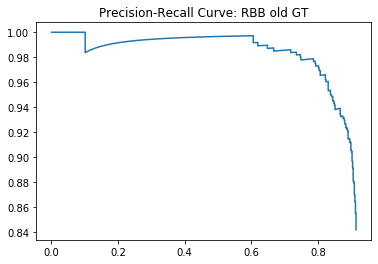

In [9]:
utils.draw_plot_xy(eval_res['rec'], eval_res['prec'], "Precision-Recall Curve: RBB updated GT")

##### with confidence score >= 0.5

Evaluation of RBB Model Against Updated Test Dataset (RBB GT): 
tp:  520
fp:  94
fn:  68
gt:  588
ap:  0.8731048609295446


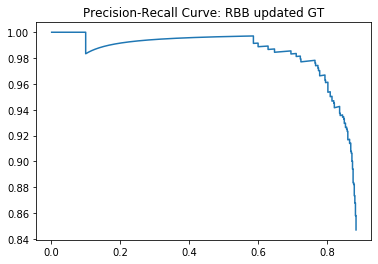

In [16]:
eval_res = rbb_evaluator.evaluate_image_folder(path_test_images, None, all_rgts, 0.5, 0.5)

print("Evaluation of RBB Model Against Updated Test Dataset (RBB GT): ")
rbb_evaluator.print_summary(eval_res)

utils.draw_plot_xy(eval_res['rec'], eval_res['prec'], "Precision-Recall Curve: RBB updated GT")

#### Check evaluation result per image against old rotated ground truths

In [16]:
rows = []

for filename in os.listdir(path_test_images)[:]:
    res = rbb_evaluator.evaluate_single_image(os.path.join(path_test_images, filename), all_rgts[filename])
    rows.append([filename, len(all_rgts[filename]), res['tp'], res['fp'], res['fn']])
    
df_result = pd.DataFrame(np.array(rows), columns=['filename', 'gt', 'tp', 'fp', 'fn'])

In [17]:
print("Result of rotated updated dataset (per image)")
display(df_result)

Result of rotated updated dataset (per image)


,filename,gt,tp,fp,fn
0,crop_1_crop_0_4955-compressed.png,34,30,7,4
1,crop_1_crop_0_964-compressed.png,17,17,2,0
2,crop_1_crop_0_747-compressed.png,22,19,4,3
3,crop_1_crop_0_96-compressed.png,36,34,7,2
4,crop_1_crop_0_905-compressed.png,36,33,3,3
5,crop_1_crop_0_698-compressed.png,20,20,6,0
6,crop_1_crop_0_4760-compressed.png,35,32,3,3
7,crop_1_crop_0_82-compressed.png,44,38,7,6
8,crop_1_crop_0_771-compressed.png,22,20,9,2
9,crop_1_crop_0_98-compressed.png,14,14,2,0


#### R2 Score Calculation

In [18]:
# y_true = df_result['gt'].to_numpy().astype(int)
# y_pred = df_result['tp'].to_numpy().astype(int) + df_result['fp'].to_numpy().astype(int)

# r2_scr = r2_score(y_true, y_pred)
# print("R2 Score (Against Old RBB GT): ", r2_scr)

#### Evaluate test images for many epochs

In [19]:
rows = []
for epoch in range(10, 2001, 10):
    print("Epoch {}", epoch)
    rbb_evaluator.build_detector_from_epoch(epoch)
    res = rbb_evaluator.evaluate_image_folder(path_test_images, None, all_rgts)
    rows.append([res['gt'], res['tp'], res['fp'], res['fn'], res['ap']])
    
df = pd.DataFrame(np.array(rows), columns=["gt", "tp", "fp", "fn", "AP"])

Epoch {} 10
Epoch {} 20
Epoch {} 30
Epoch {} 40
Epoch {} 50
Epoch {} 60
Epoch {} 70
Epoch {} 80
Epoch {} 90
Epoch {} 100
Epoch {} 110
Epoch {} 120
Epoch {} 130
Epoch {} 140
Epoch {} 150
Epoch {} 160
Epoch {} 170
Epoch {} 180
Epoch {} 190
Epoch {} 200
Epoch {} 210
Epoch {} 220
Epoch {} 230
Epoch {} 240
Epoch {} 250
Epoch {} 260
Epoch {} 270
Epoch {} 280
Epoch {} 290
Epoch {} 300
Epoch {} 310
Epoch {} 320
Epoch {} 330
Epoch {} 340
Epoch {} 350
Epoch {} 360
Epoch {} 370
Epoch {} 380
Epoch {} 390
Epoch {} 400
Epoch {} 410
Epoch {} 420
Epoch {} 430
Epoch {} 440
Epoch {} 450
Epoch {} 460
Epoch {} 470
Epoch {} 480
Epoch {} 490
Epoch {} 500
Epoch {} 510
Epoch {} 520
Epoch {} 530
Epoch {} 540
Epoch {} 550
Epoch {} 560
Epoch {} 570
Epoch {} 580
Epoch {} 590
Epoch {} 600
Epoch {} 610
Epoch {} 620
Epoch {} 630
Epoch {} 640
Epoch {} 650
Epoch {} 660
Epoch {} 670
Epoch {} 680
Epoch {} 690
Epoch {} 700
Epoch {} 710
Epoch {} 720
Epoch {} 730
Epoch {} 740
Epoch {} 750
Epoch {} 760
Epoch {} 770
Epoch {}

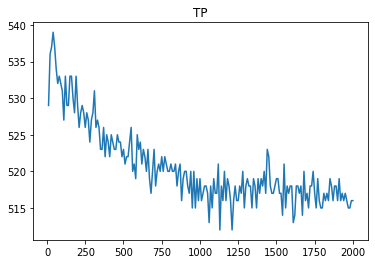

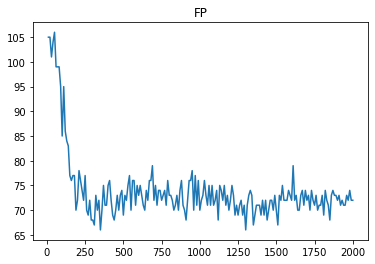

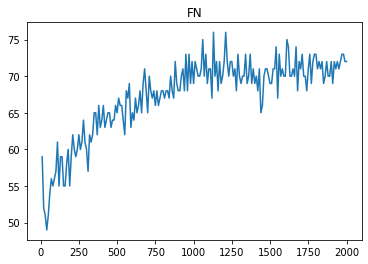

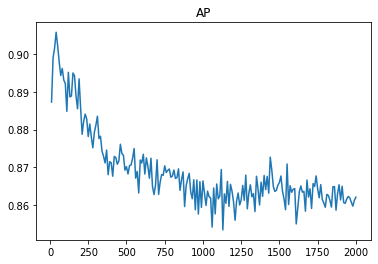

In [20]:
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df['tp'].to_numpy().astype(int), "TP")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df['fp'].to_numpy().astype(int), "FP")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df['fn'].to_numpy().astype(int), "FN")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df['AP'].to_numpy(), "AP")

In [23]:
display(df)

,gt,tp,fp,fn,AP
0,588.0,529.0,105.0,59.0,0.887286
1,588.0,536.0,105.0,52.0,0.898977
2,588.0,537.0,101.0,51.0,0.901591
3,588.0,539.0,104.0,49.0,0.905733
4,588.0,537.0,106.0,51.0,0.902167
...,...,...,...,...,...
195,588.0,516.0,73.0,72.0,0.861962
196,588.0,515.0,72.0,73.0,0.860820
197,588.0,515.0,74.0,73.0,0.859784
198,588.0,516.0,72.0,72.0,0.861342


In [27]:
display(df[df['AP'] == df['AP'].max()])

,gt,tp,fp,fn,AP
3,588.0,539.0,104.0,49.0,0.905733


##### with confidence >= 0.5

In [28]:
rows_conf = []
for epoch in range(10, 2001, 10):
    print("Epoch ", epoch)
    rbb_evaluator.build_detector_from_epoch(epoch)
    res = rbb_evaluator.evaluate_image_folder(path_test_images, None, all_rgts, 0.5, 0.5)
    rows_conf.append([res['gt'], res['tp'], res['fp'], res['fn'], res['ap']])
    
df_conf = pd.DataFrame(np.array(rows_conf), columns=["gt", "tp", "fp", "fn", "AP"])

Epoch  10
Epoch  20
Epoch  30
Epoch  40
Epoch  50
Epoch  60
Epoch  70
Epoch  80
Epoch  90
Epoch  100
Epoch  110
Epoch  120
Epoch  130
Epoch  140
Epoch  150
Epoch  160
Epoch  170
Epoch  180
Epoch  190
Epoch  200
Epoch  210
Epoch  220
Epoch  230
Epoch  240
Epoch  250
Epoch  260
Epoch  270
Epoch  280
Epoch  290
Epoch  300
Epoch  310
Epoch  320
Epoch  330
Epoch  340
Epoch  350
Epoch  360
Epoch  370
Epoch  380
Epoch  390
Epoch  400
Epoch  410
Epoch  420
Epoch  430
Epoch  440
Epoch  450
Epoch  460
Epoch  470
Epoch  480
Epoch  490
Epoch  500
Epoch  510
Epoch  520
Epoch  530
Epoch  540
Epoch  550
Epoch  560
Epoch  570
Epoch  580
Epoch  590
Epoch  600
Epoch  610
Epoch  620
Epoch  630
Epoch  640
Epoch  650
Epoch  660
Epoch  670
Epoch  680
Epoch  690
Epoch  700
Epoch  710
Epoch  720
Epoch  730
Epoch  740
Epoch  750
Epoch  760
Epoch  770
Epoch  780
Epoch  790
Epoch  800
Epoch  810
Epoch  820
Epoch  830
Epoch  840
Epoch  850
Epoch  860
Epoch  870
Epoch  880
Epoch  890
Epoch  900
Epoch  910
Epoch  9

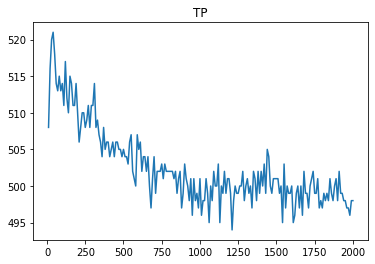

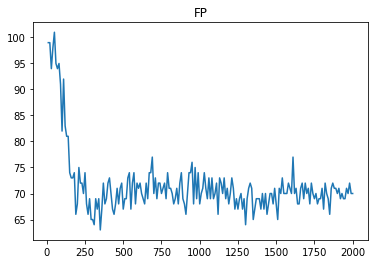

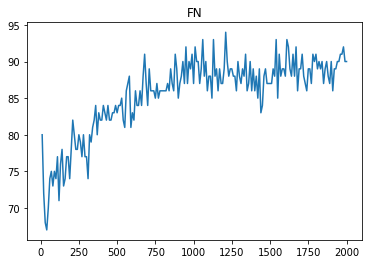

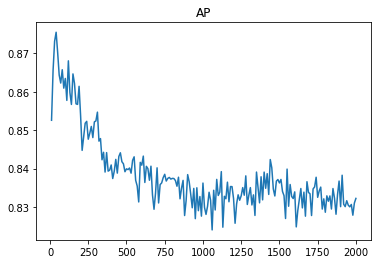

In [29]:
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df_conf['tp'].to_numpy().astype(int), "TP")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df_conf['fp'].to_numpy().astype(int), "FP")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df_conf['fn'].to_numpy().astype(int), "FN")
utils.draw_plot_xy([i for i in range(10, 2001, 10)], df_conf['AP'].to_numpy(), "AP")

In [30]:
display(df_conf[df_conf['AP'] == df_conf['AP'].max()])

,gt,tp,fp,fn,AP
3,588.0,521.0,98.0,67.0,0.875468
